# スケール・フリーネットワークモデル
###  3つの代表的なスケール・フリーネットワークモデルを紹介します。

In [1]:
import collections
import itertools
import math
import pandas as pd
from scipy.special import comb
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import plot_degree_distribution,  max_degree, average_shortest_path_length

/Users/koga/.pyenv/versions/3.8.9/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Barabasi-Albert Model


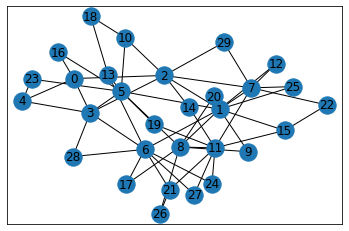

In [2]:
g = nx.barabasi_albert_graph(n=30, m=2)
nx.draw_networkx(g)

### 次数分布


In [3]:
def f(k, m):
    return 2 * m * k ** (-3)


In [4]:
G = nx.barabasi_albert_graph(n=5000, m=2)
max_deg = max_degree(G)
lines = [f(k, 2) if k != 0 else 0 for k in range(0, max_deg+1)]

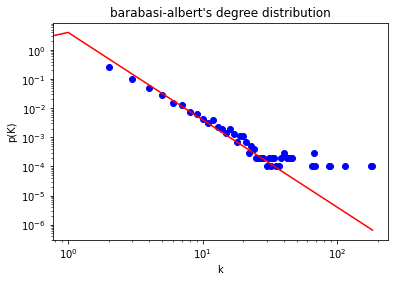

In [5]:
plot_degree_distribution(G, lines, title="barabasi-albert's degree distribution")




## Chug Lu model

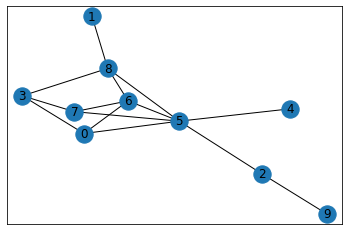

In [6]:
gamma=2.1

w = nx.utils.powerlaw_sequence(10, gamma)
G = nx.expected_degree_graph(w)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

nx.draw_networkx(G)

### 次数分布

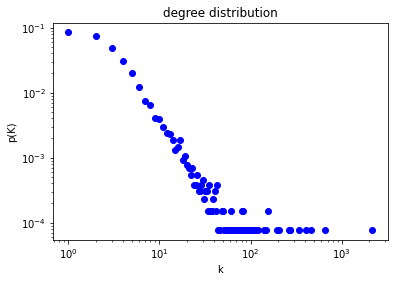

In [7]:
w = nx.utils.powerlaw_sequence(5000, gamma)
G = nx.expected_degree_graph(w)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
max_deg = max_degree(G)
# lines = [f(k, 2) if k != 0 else 0 for k in range(0, max_deg+1)]
plot_degree_distribution(G, None, title="degree distribution", )

## Configuration model


In [11]:
d = pd.read_csv("../data/ecoli_ppi_Hu_etal_2009.txt", header=None,names=["source", "target"], sep="\t| ", engine='python')
g = nx.from_pandas_edgelist(d)
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G = g.subgraph(Gcc[0])

deg = [d for n, d in G.degree()]


In [13]:
g_rand=nx.configuration_model(deg)
deg_rand = [d for n, d in g_rand.degree()]

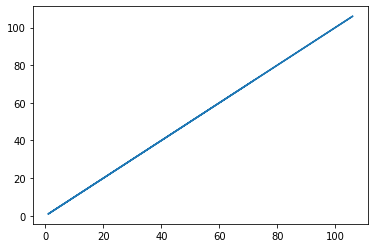

In [14]:
plt.plot(deg_rand, deg)